<a href="https://colab.research.google.com/github/bhanupratap31/Handwritten-Digit-Recognition/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd'),
              metrics=['accuracy'])

his=model.fit(x_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, Y_test))
model.evaluate(x_test, Y_test, verbose=0)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1885 - accuracy: 0.9411 - val_loss: 0.0709 - val_accuracy: 0.9768
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0425 - val_accuracy: 0.9844
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0352 - val_accuracy: 0.9877
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0403 - val_accuracy: 0.9871


[0.04033396096455981, 0.9871000051498413]

In [0]:
print('ytest-----------')
print(y_test)
print('y_pred--------')
pred=model.predict(x_test, batch_size=128)
print(pred)

#Confusion matrix
import numpy as np
def conf_mat(actual, pred):
  n=len(np.unique(actual))
  mat=np.zeros(n,n)

  for i in range(len(actual)):
    mat[actual[i-1]][pred[i-1]]+=1

  return mat
print(conf_mat(y_test,pred))

ytest-----------
[7 2 1 ... 4 5 6]
y_pred--------
[[2.6192631e-10 9.0923918e-10 3.9693205e-08 ... 9.9999225e-01
  1.1086476e-09 8.2649245e-07]
 [7.9137773e-11 2.6368107e-07 9.9999976e-01 ... 5.4233059e-12
  7.3521099e-11 3.9015679e-13]
 [6.6722987e-09 9.9998927e-01 6.9940725e-08 ... 8.3761279e-06
  1.1237915e-06 1.7366244e-08]
 ...
 [1.1555127e-16 4.2060806e-11 5.6577269e-16 ... 1.0723358e-08
  6.5627231e-10 1.7586835e-06]
 [3.9615819e-12 5.6164459e-13 7.4840858e-15 ... 3.4720692e-11
  3.8461641e-07 3.3621141e-11]
 [7.5520445e-10 1.4883619e-11 9.3711861e-08 ... 1.0592528e-14
  2.0590454e-10 6.5218123e-11]]


TypeError: ignored

Text(0.5, 1.0, 'Accuracy Curves')

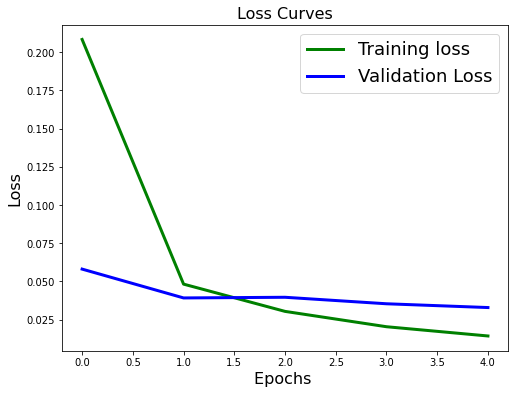

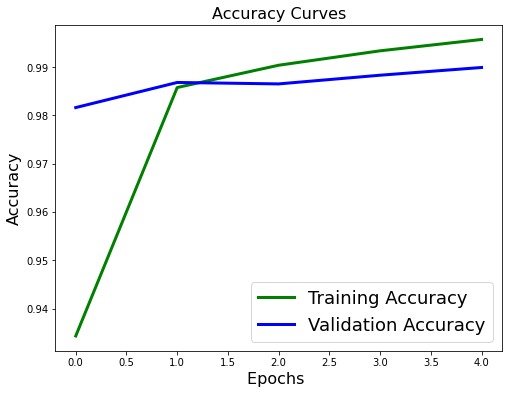

In [0]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'g',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'g',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)